In [5]:
%reload_ext autoreload
%autoreload 2

In [4]:
import os
import sys 
import seaborn as sns

import pandas as pd
from matplotlib import pyplot as plt

from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

In [6]:
# Add parent directory to path to import modules from src
rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils

In [8]:
# Initialize DataLoader
sl = SlackDataLoader('../Anonymized_B6SlackExport_25Nov23/anonymized/')

### Columns we can get from a slack message<br>

message_type, message_content, sender_id, time_sent, message_distribution, time_thread_start, reply_count, reply_user_count, time_thread_end, reply_users

From a single slack message, we can get <br>

1. The message<br>
2. Type (message, file, link, etc)<br>
3. The sender_id (assigned by slack)<br>
4. The time the message was sent<br>
5. The team (i don't know what that is now)<br>
6. The type of the message (broadcast message, inhouse, just messgae)<br>
7. The thread the message generated (from here we can go):<br>
    7.1 Text/content of the message<br>
    7.2 The thread time of the message<br>
    7.3 The thread count (reply count)<br>
    7.4 The number of user that reply the message (count of users that participated in the thread)<br>
    7.5 The time the last thread message was sent <br>
    7.6 The users that participated in the thread (their ids are stored as well)<br>

In [21]:
def get_top_20_user(data, channel='Random'):
    """get user with the highest number of message sent to any channel"""

    data['sender_name'].value_counts()[:20].plot.bar(figsize=(15, 7.5))
    plt.title(f'Top 20 Message Senders in #{channel} channels', size=15, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

    data['sender_name'].value_counts()[-10:].plot.bar(figsize=(15, 7.5))
    plt.title(f'Bottom 10 Message Senders in #{channel} channels', size=15, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=14);
    plt.xticks(size=12); plt.yticks(size=12);
    plt.show()

def draw_avg_reply_count(data, channel='Random'):
    """who commands many reply?"""

    data.groupby('sender_name')['reply_count'].mean().sort_values(ascending=False)[:20]\
        .plot(kind='bar', figsize=(15,7.5));
    plt.title(f'Average Number of reply count per Sender in #{channel}', size=20, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

def draw_avg_reply_users_count(data, channel='Random'):
    """who commands many user reply?"""

    data.groupby('sender_name')['reply_users_count'].mean().sort_values(ascending=False)[:20].plot(kind='bar',
     figsize=(15,7.5));
    plt.title(f'Average Number of reply user count per Sender in #{channel}', size=20, fontweight='bold')
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()

def draw_wordcloud(msg_content, week):    
    # word cloud visualization
    allWords = ' '.join([twts for twts in msg_content])
    wordCloud = WordCloud(background_color='#975429', width=500, height=300, random_state=21, max_words=500, mode='RGBA',
                            max_font_size=140, stopwords=stopwords.words('english')).generate(allWords)
    plt.figure(figsize=(15, 7.5))
    plt.imshow(wordCloud, interpolation="bilinear")
    plt.axis('off')
    plt.tight_layout()
    plt.title(f'WordCloud for {week}', size=30)
    plt.show()

def draw_user_reaction(data, channel='General'):
    data.groupby('sender_name')[['reply_count', 'reply_users_count']].sum()\
        .sort_values(by='reply_count',ascending=False)[:10].plot(kind='bar', figsize=(15, 7.5))
    plt.title(f'User with the most reaction in #{channel}', size=25);
    plt.xlabel("Sender Name", size=18); plt.ylabel("Frequency", size=18);
    plt.xticks(size=14); plt.yticks(size=14);
    plt.show()
def top_10_senders_eda(df):

    # Find the top 10 senders by maximum reply_count
    top_10_senders = df.groupby('sender_name')['reply_count'].max().nlargest(10).reset_index()

    # Plot a bar chart for the top 10 senders by maximum reply_count
    plt.figure(figsize=(12, 6))
    sns.barplot(x='sender_name', y='reply_count', data=top_10_senders)
    plt.title('Top 10 Senders by Maximum Reply Count')
    plt.xlabel('Sender Name')
    plt.ylabel('Maximum Reply Count')
    plt.xticks(rotation=45)
    plt.show()

def bottom_10_senders_eda(df):

    # Find the top 10 senders by maximum reply_count
    bottom_10_senders_eda = df.groupby('sender_name')['reply_count'].min().nsmallest(10).reset_index()

    # Plot a bar chart for the top 10 senders by maximum reply_count
    plt.figure(figsize=(12, 6))
    sns.barplot(x='sender_name', y='reply_count', data=bottom_10_senders_eda)
    plt.title('Bottom 10 Senders by Maximum Reply Count')
    plt.xlabel('Sender Name')
    plt.ylabel('Maximum Reply Count')
    plt.xticks(rotation=45)
    plt.show()

## Insight Extraction

Below are some useful questions to answer. Feel free to explore to answer other interesting questions that may be of help to get insight about student's behaviour, need, and future performance 

In [10]:
# converting all json files for all-community-building channel to dataframe using slack_parser method from loader script
df_community = sl.slack_parser('../Anonymized_B6SlackExport_25Nov23/anonymized/all-community-building/')

In [11]:
df_community.head()

,msg_type,msg_content,sender_name,msg_sent_time,msg_dist_type,time_thread_start,reply_count,reply_users_count,reply_users,tm_thread_end,channel
0,message,Thank you everyone for the questions and feedb...,Garrett Bell,1663318741.059069,text,0,0,0,0,0,
1,message,*<!here> Community Building Session REMINDER!*...,Vanessa Norman,1663329000.753329,broadcast,0,0,0,0,0,
2,message,*HELLLLLLLLOOOOOOO COMMUNITY*,Vanessa Norman,1663329646.957849,text,0,0,0,0,0,
3,message,Hiiiiiiiiiiii,Miguel Herring,1663329654.789969,text,0,0,0,0,0,
4,message,Hello,Debra Lawrence,1663329658.959309,text,0,0,0,0,0,


In [12]:
df_community.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   msg_type           7613 non-null   object
 1   msg_content        7613 non-null   object
 2   sender_name        7613 non-null   object
 3   msg_sent_time      7613 non-null   object
 4   msg_dist_type      7613 non-null   object
 5   time_thread_start  7613 non-null   object
 6   reply_count        7613 non-null   int64 
 7   reply_users_count  7613 non-null   int64 
 8   reply_users        7613 non-null   object
 9   tm_thread_end      7613 non-null   object
 10  channel            7613 non-null   object
dtypes: int64(2), object(9)
memory usage: 654.4+ KB


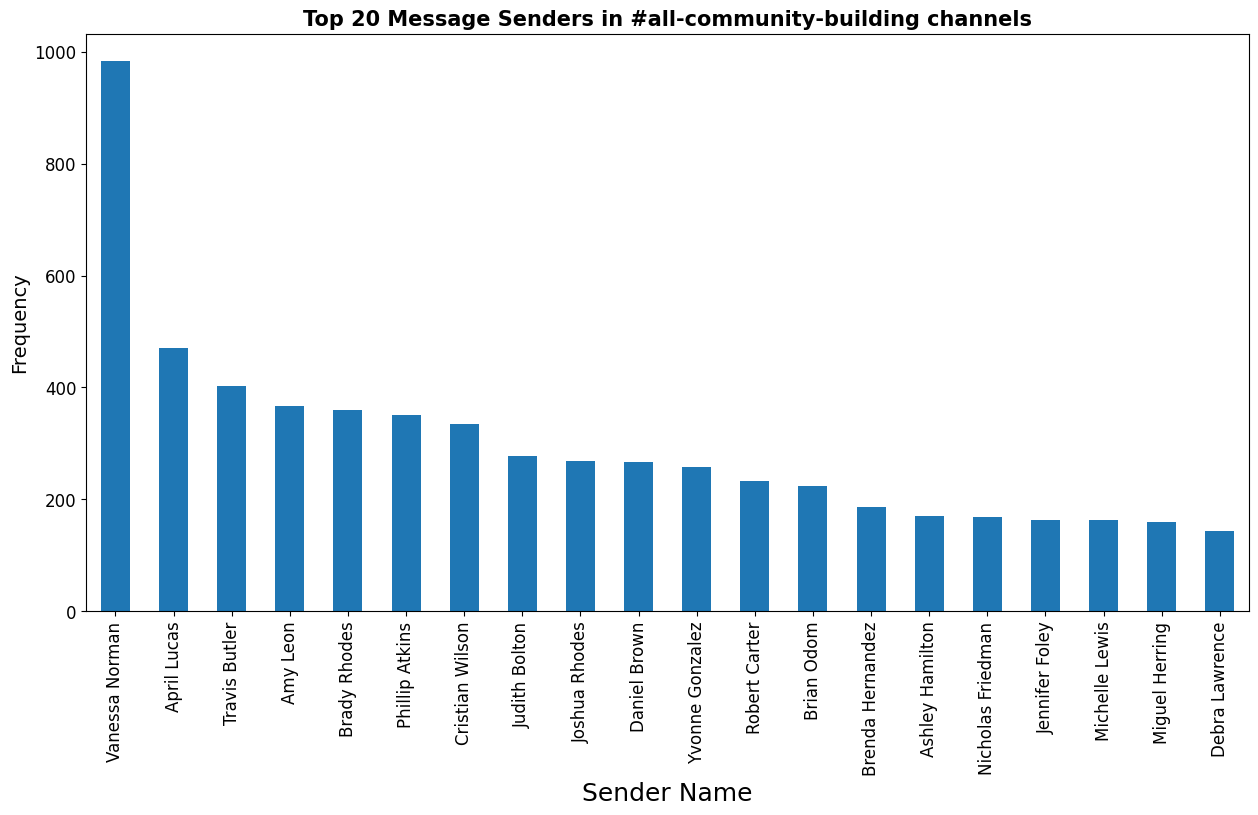

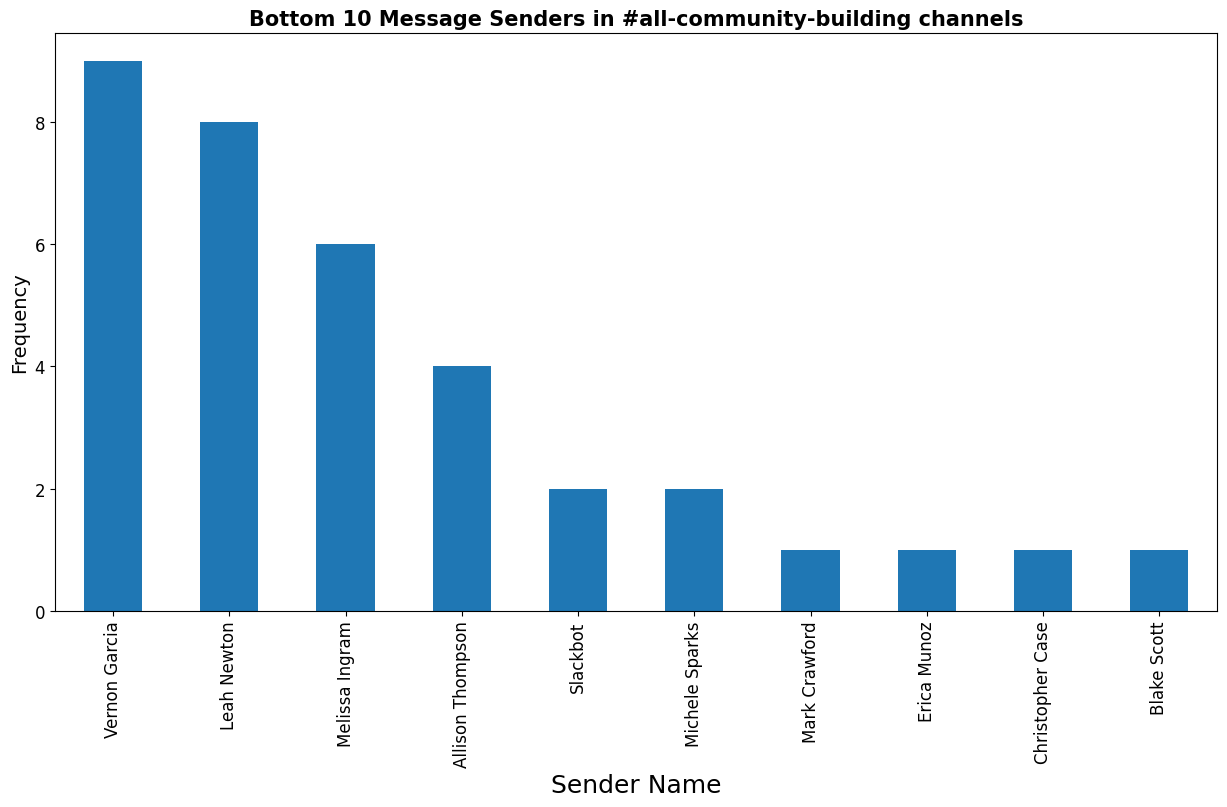

In [13]:
### get user with the highest number of message sent to any channel
get_top_20_user(df_community, channel='all-community-building')

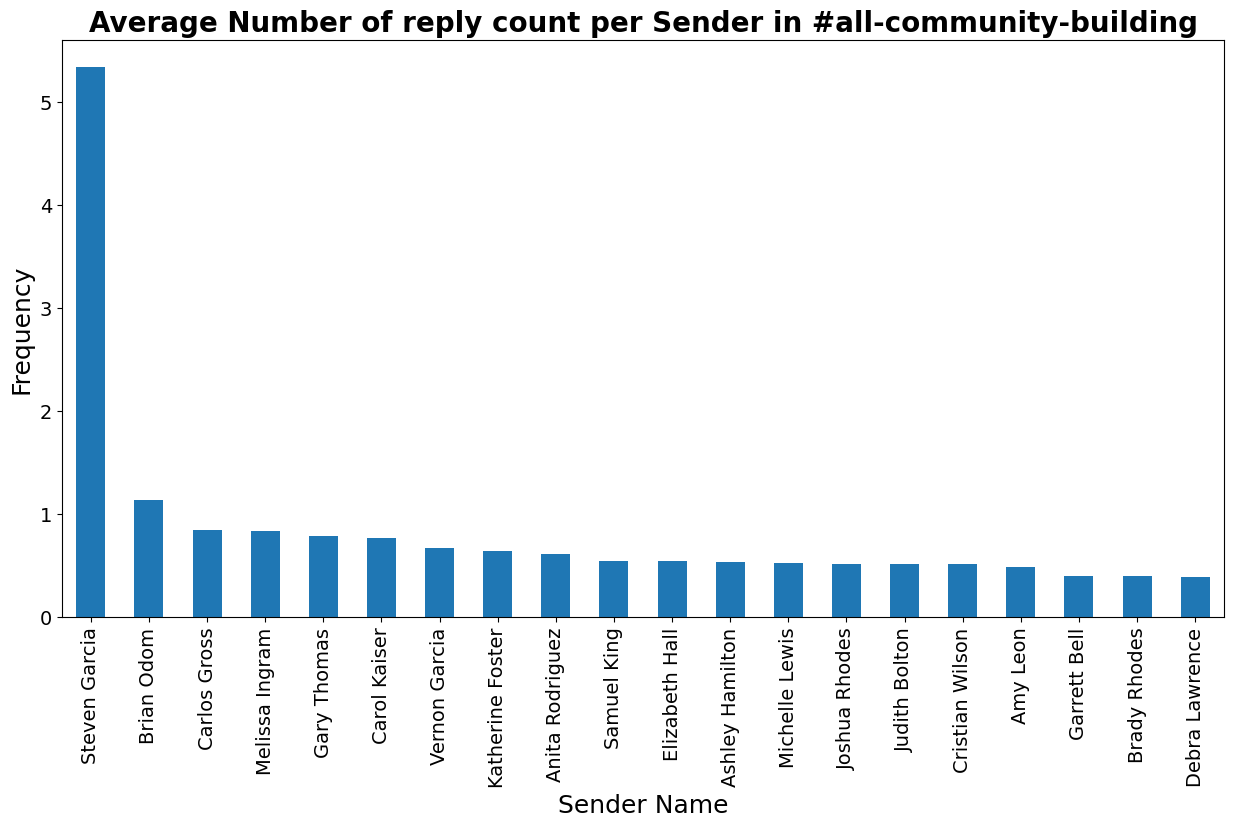

In [14]:
# Average number of reply count per sender
draw_avg_reply_count(df_community, channel='all-community-building')

In [15]:
msg_content = sl.get_channel_messages(channel_name='all-community-building')

# which user has the highest number of reply counts?
The premise for the above question exploratory data analysis (EDA) assumes that reply counts are tallied individually for each message and are not aggregated on a per-user basis.

In [16]:
# Find the index of the maximum reply_count
max_reply_count= df_community['reply_count'].max()
max_reply_count

75

In [17]:
# Find the index of the maximum reply_count
max_reply_index = df_community['reply_count'].idxmax()

# Get the user with the maximum reply_count
user_with_max_reply = df_community.loc[max_reply_index, 'sender_name']

print(f"The user with the maximum reply_count is: {user_with_max_reply}")

The user with the maximum reply_count is: Brian Odom


# top and bottom 10 users by Reply count

In [18]:
# Find the top 10 senders by maximum reply_count
top_10_senders = df_community.groupby('sender_name')['reply_count'].max().nlargest(10).reset_index()
# top_10_users = df.nlargest(10, 'reply_count')
print("Top 10 users by reply_count:")
print(top_10_senders[['sender_name', 'reply_count']])

Top 10 users by reply_count:
      sender_name  reply_count
0      Brian Odom           75
1   Steven Garcia           63
2     Samuel King           27
3        Amy Leon           25
4    Brady Rhodes           24
5   Travis Butler           23
6  Vanessa Norman           22
7   Judith Bolton           20
8    Carlos Gross           17
9     April Lucas           16


In [19]:
# Bottom 10 users by reply_count
bottom_10_users = df_community.groupby('sender_name')['reply_count'].min().nsmallest(10).reset_index()
print("\nBottom 10 users by reply_count:")
print(bottom_10_users[['sender_name', 'reply_count']])


Bottom 10 users by reply_count:
        sender_name  reply_count
0  Allison Thompson            0
1          Amy Leon            0
2   Anita Rodriguez            0
3  Anthony Galloway            0
4       April Lucas            0
5   Ashley Hamilton            0
6       Blake Scott            0
7      Brady Rhodes            0
8  Brenda Hernandez            0
9        Brian Odom            0


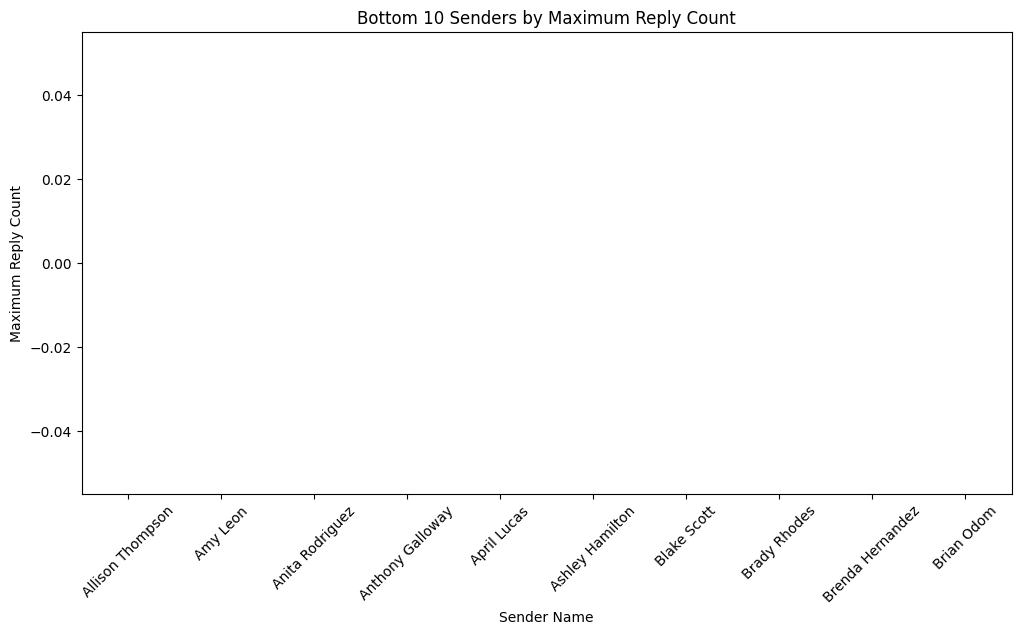

In [22]:
# histogram plot for bottom_10_users
bottom_10_senders_eda(df_community)

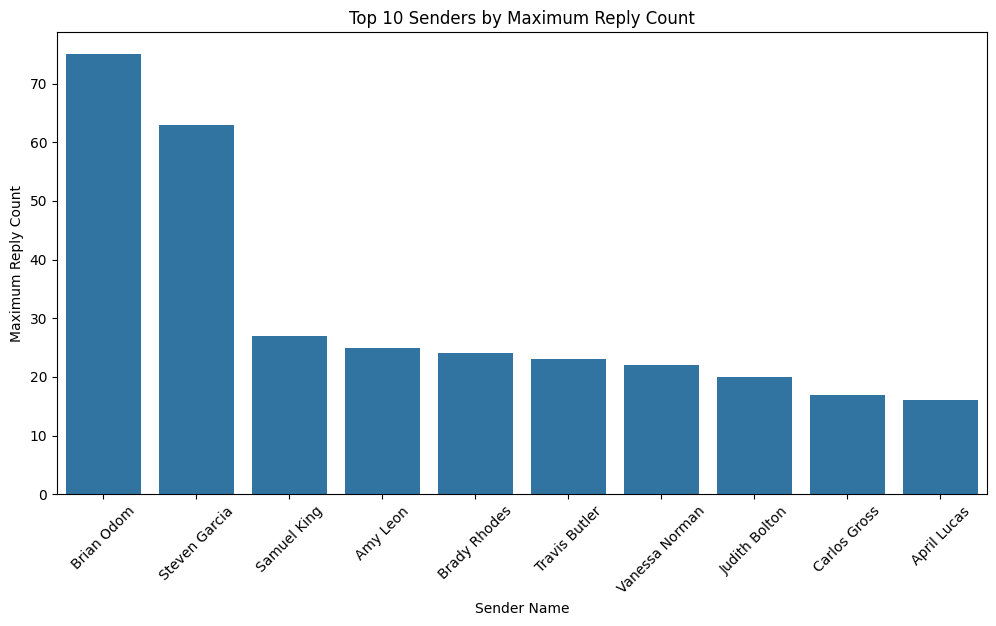

In [23]:
# histogram plot for bottom_10_users
top_10_senders_eda(df_community)

In [24]:
df_community.shape

(7613, 11)

# Visualize reply counts per user per channel
The premise for the above question exploratory data analysis (EDA) assumes that reply counts are aggregated on a per-user basis on a specified channel(all-community-building).

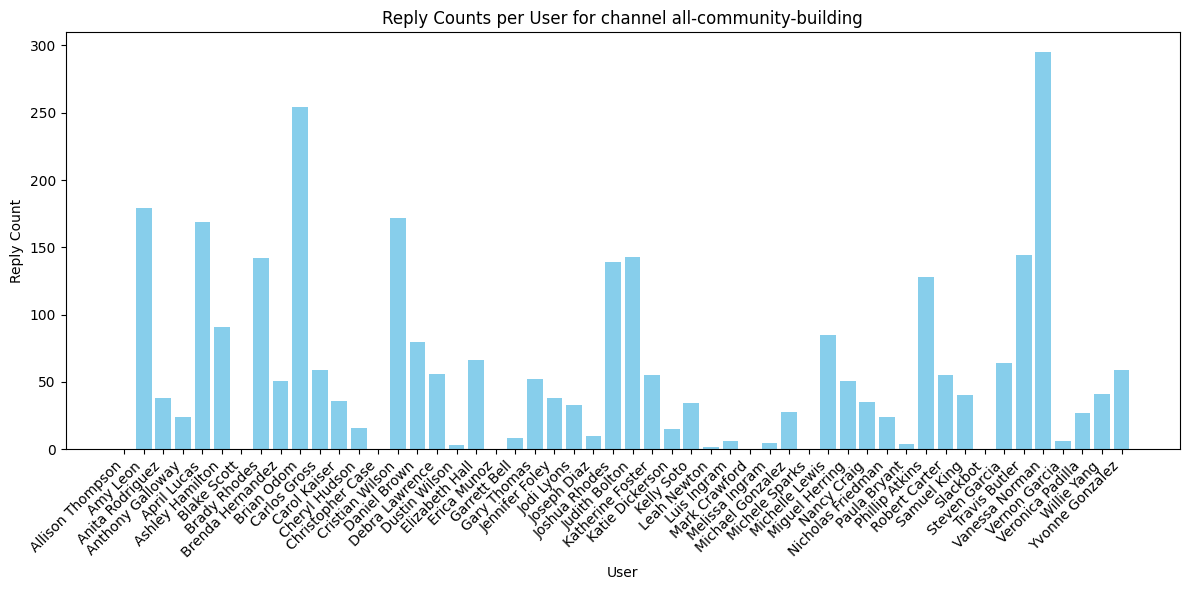

In [26]:
# let's visualize it for all-community-building channel
# Aggregate reply counts per user
pivot_df = df_community.groupby('sender_name')['reply_count'].sum().reset_index()

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(pivot_df['sender_name'], pivot_df['reply_count'], color='skyblue')
plt.xlabel('User')
plt.ylabel('Reply Count')
plt.title('Reply Counts per User for channel all-community-building')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# what is the time range of the day that most messages are sent?

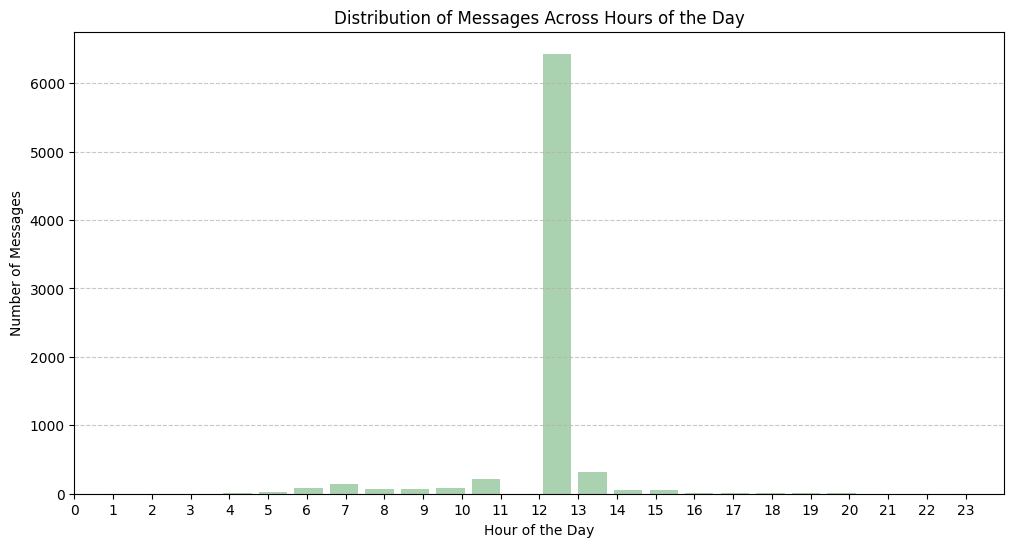

The time range of the day with the most messages is approximately 12:00 to 13:00.


In [27]:
# Convert 'msg_sent_time' to datetime with Unix timestamp format
df_community['msg_sent_time'] = pd.to_datetime(df_community['msg_sent_time'], unit='s')

# Extract the hour from the 'msg_sent_time' column
df_community['hour'] = df_community['msg_sent_time'].dt.hour

# Plot a histogram to visualize the distribution of messages across hours
plt.figure(figsize=(12, 6))
df_community['hour'].plot(kind='hist', bins=24, rwidth=0.8, color='#86bf91', alpha=0.7)
plt.title('Distribution of Messages Across Hours of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Messages')
plt.xticks(range(24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Find the hour range with the highest message count
most_active_hour_range = df_community['hour'].value_counts().idxmax()
print(f"The time range of the day with the most messages is approximately {most_active_hour_range}:00 to {(most_active_hour_range + 1) % 24}:00.")

# what kind of messages are replied faster than others?

In [ ]:
# Convert 'msg_sent_time' and 'tm_thread_end' to datetime
df['msg_sent_time'] = pd.to_datetime(df['msg_sent_time'], unit='s')
df['time_thread_start'] = pd.to_datetime(df['time_thread_start'], unit='s')

# Calculate the time taken to reply to each message
df['reply_time'] = (df['time_thread_start'] - df['msg_sent_time']).dt.total_seconds()

average_reply_time_per_type = df.groupby('msg_type')['reply_time'].mean()

# Plot a bar chart
plt.figure(figsize=(12, 6))
average_reply_time_per_type.plot(kind='bar', color='#86bf91', alpha=0.7)
plt.title('Average Reply Time per Message Type')
plt.xlabel('Message Type')
plt.ylabel('Average Reply Time (seconds)')
plt.xticks(rotation=45)
plt.show()

### unfortunately on this channel the message type is only message

In [ ]:
# Relationship between # of messages and # of reactions

    
df_reaction = sdl.parse_slack_reaction(channel='all-technical-support',path_channel='../Anonymized_B6SlackExport_25Nov23/anonymized/all-technical-support/')

In [ ]:
df_reaction.columns

### Classify messages into different categories such as questions, answers, comments, etc.

In [ ]:
# Function to classify messages
def classify_message(msg):
    # Tokenize the message
    words = word_tokenize(msg.lower())  # Convert to lowercase for case-insensitivity
    
    # Remove stopwords
    filtered_words = [word for word in words if word.isalnum() and word not in stopwords.words('english')]
    
    # Example classification logic (customize based on your needs)
    if '?' in filtered_words:
        return 'Question'
    elif 'thanks' in filtered_words or 'thank you' in filtered_words:
        return 'Thanks'
    elif 'nice' in filtered_words or 'good job' in filtered_words:
        return 'Appreciation'
    else:
        return 'Other'

# Apply the classification function to each message in the DataFrame
df['message_category'] = df['msg_content'].apply(classify_message)

In [ ]:
category_counts = df['message_category'].value_counts()

# Plot a bar chart
category_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Message Category')
plt.ylabel('Count')
plt.title('Message Category Distribution')
plt.show()

## Which users got the most reactions?

In [ ]:
user_reactions = df_reaction.groupby('user_id')['reaction_count'].sum()

# Sort the results to get the users with the most reactions
user_reactions = user_reactions.sort_values(ascending=False)

# Display the user_id and reaction_count for the top users
top_users_reactions = user_reactions.reset_index()
print(top_users_reactions[['user_id', 'reaction_count']])

In [ ]:
user_id_name_dict = sdl.get_user_map()

In [ ]:
# Access the dictionary within the tuple
user_id_name_dict = user_id_name_dict[0]

# Create a DataFrame from the dictionary
df_users = pd.DataFrame(list(user_id_name_dict.items()), columns=['user_id', 'name'])

In [ ]:
# Merge the two DataFrames on the 'user_id' column
df_merged = pd.merge(top_users_reactions, df_users, on='user_id')

# Print the merged DataFrame
print(df_merged)

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_merged['name'], df_merged['reaction_count'], color='skyblue')
plt.xlabel('User Name')
plt.ylabel('Reaction Count')
plt.title('Reaction Counts by User')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

## Model topics mentioned in the channel

In [ ]:
import pandas as pd
from gensim import corpora, models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming 'message' is the column containing text data
text_data = df_reaction['message'].astype(str)

# Tokenize the text
tokenized_text = [word_tokenize(text.lower()) for text in text_data]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_text = [[word for word in text if word.isalnum() and word not in stop_words] for text in tokenized_text]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(filtered_text)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in filtered_text]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Print the topics
for topic_id, topic in lda_model.print_topics():
    print(f'Topic {topic_id + 1}: {topic}')

# Get the topic distribution for a specific document
document_index = 0  # Change this to the index of the document you want to analyze
doc_topics = lda_model.get_document_topics(corpus[document_index])
print(f'Topic distribution for document {document_index + 1}: {doc_topics}')

In [ ]:
# What are the topics that got the most reactions?

reaction_counts = df_reaction['reaction_count']

# Tokenize the text
tokenized_text = [word_tokenize(text.lower()) for text in text_data]

# Remove stop words
stop_words = set(stopwords.words('english'))
filtered_text = [[word for word in text if word.isalnum() and word not in stop_words] for text in tokenized_text]

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(filtered_text)

# Create a bag-of-words representation of the documents
corpus = [dictionary.doc2bow(text) for text in filtered_text]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Create a DataFrame to store the topic distribution for each document
topic_distribution = pd.DataFrame(lda_model[corpus], columns=[f'Topic_{i+1}' for i in range(lda_model.num_topics)])

# Concatenate the topic distribution DataFrame with the original DataFrame
df_with_topics = pd.concat([df_reaction, topic_distribution], axis=1)

# Group by the topic columns and sum the reaction counts
topic_reaction_counts = df_with_topics.groupby(topic_distribution.columns.tolist(), as_index=False)['reaction_count'].sum()

# Print the topics and their associated reaction counts
for index, row in topic_reaction_counts.iterrows():
    print(f'Topic {row[topic_distribution.columns.tolist()]}: {row["reaction_count"]}')

### Harder questions to look into

In [ ]:
# Based on messages, reactions, references shared, and other relevant data such as classification of questions into techical question, comment, answer, aorder stu the python, statistics, and sql skill level of a user?